# 1 Importation des modules et chargement du dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

df=pd.read_csv('Titanic-Dataset.csv')
df.head()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# DIMENSION DE LA BASE DE DONNEES 
df.shape

(891, 12)

In [3]:
# type des variables du dataset
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 2 Analyse exploratoire

/tmp/ipykernel_6844/2885670339.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df,palette='RdBu_r')


<AxesSubplot:xlabel='Survived', ylabel='count'>

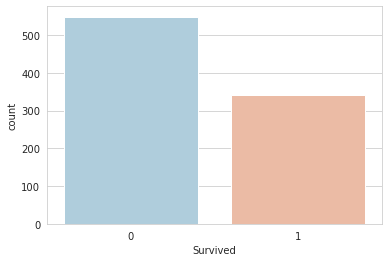

In [4]:
# On fait count plot sur la variable Sruvived 
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')

## On va faire maintenant un countplot en fonction du sexe 

<AxesSubplot:xlabel='Survived', ylabel='count'>

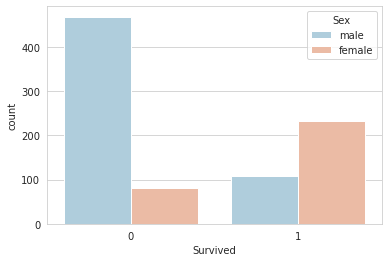

In [5]:
sns.countplot(x='Survived',data=df,hue='Sex',palette='RdBu_r')

## maintenant un countplot selon la classe 

<AxesSubplot:xlabel='Survived', ylabel='count'>

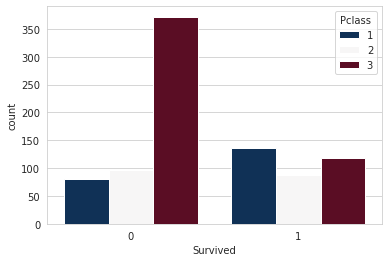

In [6]:
sns.countplot(x='Survived',data=df,hue='Pclass',palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

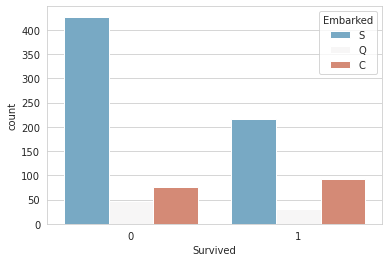

In [7]:
sns.countplot(x='Survived',data=df,hue='Embarked',palette='RdBu_r')

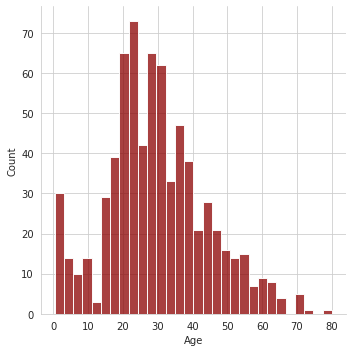

In [8]:
sns.displot(df['Age'],kde=False,bins=30,color='darkred')

## Analysons les données manquantes

<AxesSubplot:>

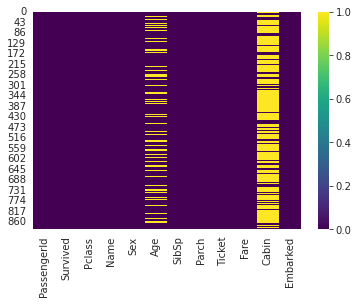

In [9]:
# Analyse des données manquantes 
df.isnull().sum() # ou un heatmap
sns.heatmap(df.isnull(),cmap='viridis')

# 3 Data cleaning :traiter les valeurs manquantes qu'on a réperé précedemment
## 3.1 on va imputer les ages manquants par la moyenne des ages de chaque classe

/tmp/ipykernel_6844/4043733822.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

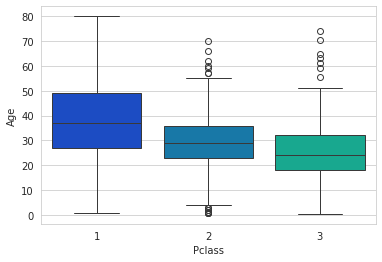

In [10]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [11]:
#creér une fonction qui va faire l'imputation
def imputer_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

# Maintenant on va appliquer la fonction sur la colone age


In [12]:
df['Age']=df[['Age','Pclass']].apply(imputer_age,axis=1)
df.head()

/tmp/ipykernel_6844/2535836526.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=cols[0]
/tmp/ipykernel_6844/2535836526.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=cols[1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### . verifions voir si la fonction a été vraiment appliqué 

<AxesSubplot:>

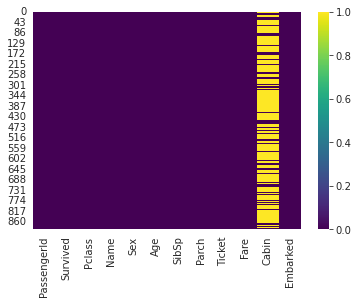

In [13]:
sns.heatmap(df.isnull(),cmap='viridis')

## 3.2 on 78% des données manquantes pour la variable Cabin et elle n'est pas vraiment important pour le modèle donc on va juste supprimer la variable Cabi
 

In [14]:
df.drop('Cabin',axis=1,inplace=True)


In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
df.isnull().sum()
#df.head()

PassengerId    2
Survived       2
Pclass         2
Sex            2
Age            2
SibSp          2
Parch          2
Fare           2
S              2
C              2
dtype: int64

## 3.3 pour la variable Embarked on a 2 données manquantes sur 891 donc on peut décider de supprimer les deux donnés sans problème

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()
#df.describe()
#df.head()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
S              0
C              0
dtype: int64

### On remarque qu'il n'ya plus de valeur manquantes

# 4 Conversion des valeurs qualitatives 

## 4.1 Tout d'abord on va supprimer les variables name et ticket car ils sont pas explicatifs pour notre modèle

In [20]:
df.drop(['Name','Ticket'],axis=1,inplace=True)


array(['S', 'C', 'Q'], dtype=object)

## 4.2 Maintenant le port d'embarcation d'après l'analyse exploratoire il s'avère important donc on va le convertir en une variable quantitatif

In [34]:
#df['Embarked'].unique()
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,C
0,1.0,0.0,3.0,1,22.0,1.0,0.0,7.2500,0.0,0.0
1,2.0,1.0,1.0,0,38.0,1.0,0.0,71.2833,1.0,0.0
2,3.0,1.0,3.0,0,26.0,0.0,0.0,7.9250,0.0,0.0
3,4.0,1.0,1.0,0,35.0,1.0,0.0,53.1000,0.0,0.0
4,5.0,0.0,3.0,1,35.0,0.0,0.0,8.0500,0.0,0.0


In [21]:

from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
labels = enc.fit_transform(df.Embarked.values.reshape(-1, 1)).toarray()
labels.shape
df = pd.concat([df,
        pd.DataFrame(columns = ['S','C'],
                      data = labels[:, :2])],
        axis = 1)
df.drop('Embarked',axis=1,inplace=True)


## 4.3 Egalement la variable sexe est important pour notre modèle d'après AE faites en alors ca conversion

In [22]:
df['Sex'].unique()

array(['male', 'female', nan], dtype=object)

In [23]:
df.loc[df['Sex']=='male','Sex']=1
df.loc[df['Sex']=='female','Sex']=0
df.head()
df['Sex'].unique()

array([1, 0, nan], dtype=object)

In [35]:
df.head()
#df.isnull().sum()
#df.shape

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,C
0,1.0,0.0,3.0,1,22.0,1.0,0.0,7.2500,0.0,0.0
1,2.0,1.0,1.0,0,38.0,1.0,0.0,71.2833,1.0,0.0
2,3.0,1.0,3.0,0,26.0,0.0,0.0,7.9250,0.0,0.0
3,4.0,1.0,1.0,0,35.0,1.0,0.0,53.1000,0.0,0.0
4,5.0,0.0,3.0,1,35.0,0.0,0.0,8.0500,0.0,0.0


# 5 Préparation du dataset en echantillon de train  et de test

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X=df.drop('Survived',axis=1);
y=df['Survived']

In [38]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,S,C
0,1.0,3.0,1,22.0,1.0,0.0,7.2500,0.0,0.0
1,2.0,1.0,0,38.0,1.0,0.0,71.2833,1.0,0.0
2,3.0,3.0,0,26.0,0.0,0.0,7.9250,0.0,0.0
3,4.0,1.0,0,35.0,1.0,0.0,53.1000,0.0,0.0
4,5.0,3.0,1,35.0,0.0,0.0,8.0500,0.0,0.0


In [39]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 6 Utilisation de l'algorithme logistic regression pour la construction de notre modèle

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
model=LogisticRegression(solver='liblinear')

## Train model

In [44]:
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

## Phase de test

In [45]:
ypredict=model.predict(X_test)

## Evaluatioin du modèle

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,ypredict))

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       102
         1.0       0.77      0.67      0.72        76

    accuracy                           0.78       178
   macro avg       0.77      0.76      0.77       178
weighted avg       0.78      0.78      0.77       178

